In [1]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

from train import train_all_models, get_best_model
from morphamizer import create_morphamaized_file
from utils import get_strongest_words
import utils
import morphamizer as morph
from pathlib import Path
from evaluate_sentiment import Evaluator
import pandas as pd
from classifiers import *
import utils
import morphamizer as morph
from train import data_pre_processing,data_acquisition,train_eval_model,ngram_text_tf_idf

In [2]:
BEST_MODEL_PATH = 'finalized_tweet_model.sav'

TEST_PATH = r'data\test_tweet_data_labeld_final_morph.tsv'

TRAIN_PATH = r'data\train_tweet_data_labeld_final_morph.tsv'
train=True
to_morph=False
print_info=True
with_stat=True
save_model_f=True

2.0    368
0.0    163
1.0     76
Name: label, dtype: int64
2.0    0.606260
0.0    0.268534
1.0    0.125206
Name: label, dtype: float64


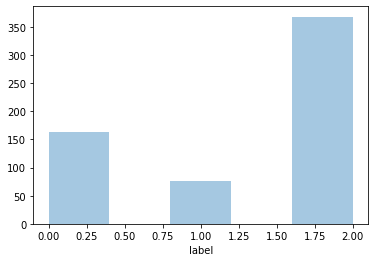

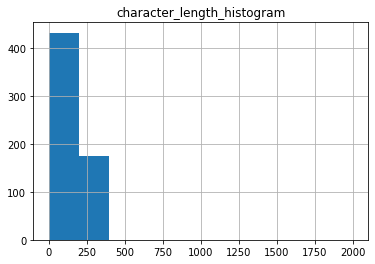

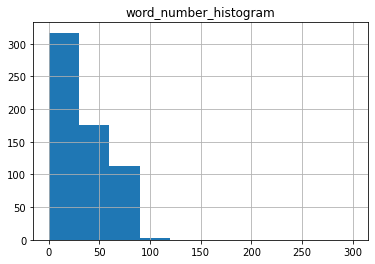

['של', 'את', 'זה', 'אמח']


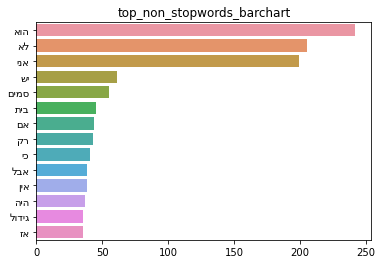

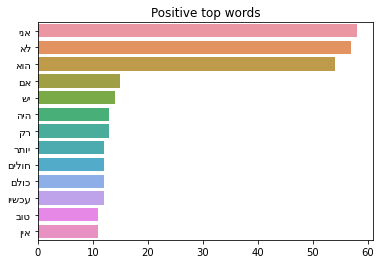

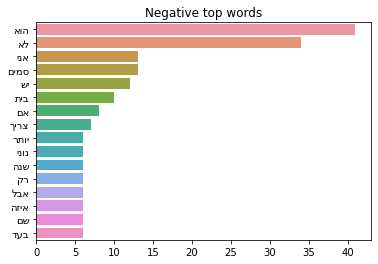

In [3]:
train_path = TRAIN_PATH
test_path = TEST_PATH
train_path = Path(train_path)
test_path = Path(test_path)
test_raw = pd.read_csv(test_path, sep="\t", encoding="utf-8", names=["text", "label"])
train_raw = pd.read_csv(train_path, sep="\t", encoding="utf-8", names=["text", "label"])
if to_morph:

    test_df = morph.morph_df(morph.get_clean_data(train_raw), tosave=True, morph_path=MORPH_TEST_PATH)
    train_df = morph.morph_df(morph.get_clean_data(test_raw), tosave=True, morph_path=MORPH_TRAIN_PATH)


else:

    train_df = morph.get_clean_data(train_raw)
    test_df = morph.get_clean_data(test_raw)

train_df.loc[:, "label"] = train_df.label.astype("category")
text = train_df["text"]
if print_info:
    utils.print_data_layout(train_df)
if with_stat:
    utils.plot_character_length_histogram(text)
    utils.plot_word_number_histogram(train_df.text)
    stop = utils.get_hebrew_stopwords()
    utils.plot_top_non_stopwords_barchart(text, stop)
    utils.plot_top_non_stopwords_barchart(train_df[train_df.label == 0].text, stop, "Positive top words")
    utils.plot_top_non_stopwords_barchart(train_df[train_df.label == 1].text, stop, "Negative top words")



X_train_counts, X_test_counts, X_train_tf, X_test_tfidf, count_vect = data_pre_processing(train_df, test_df)
evaluator = Evaluator(test_path, test_df)

In [4]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train_df.text)
X_test_counts = count_vect.transform(test_df.text)
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_test_tfidf = tf_transformer.transform(X_test_counts)
evaluator = Evaluator(test_path, test_df)

In [5]:
majority_classifier(test_df, evaluator, 0)
throw_a_die_classifier(test_df, evaluator)
model_dict = get_all_Models(size=test_df.shape)

The Majority Classifier's results are: 
Micro precision:0.2679738562091503, recall:0.2679738562091503, f1:0.2679738562091503
Macro precision:0.08932461873638343, recall:0.3333333333333333, f1:0.140893470790378
[[41  0  0]
 [20  0  0]
 [92  0  0]]
Accuracy: 0.2679738562091503


The Throw a die Classifier's results are: 
Micro precision:0.21568627450980393, recall:0.21568627450980393, f1:0.21568627450980393
Macro precision:0.14044429176686135, recall:0.3536585365853659, f1:0.1979213198725394
[[23 18  0]
 [10 10  0]
 [49 43  0]]
Accuracy: 0.21568627450980393




C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
count=0
for model in model_dict:
    clf, mic, mac, cm, acc, pred = train_eval_model(model_dict[model][utils.CLF], model, X_train_tf, train_df,
                                                    X_test_tfidf,
                                                    evaluator, error_analysis=print_info)
    model_dict = utils.update_dict(model_dict, model, clf, mic, mac, cm, acc, pred)

    count += 1
ngrams = [(1, 2), (1, 3)]
for ngram in ngrams:
    modles = get_all_Models(size=test_df.shape)

    X_train_tf, X_test_tfidf = ngram_text_tf_idf(train_df, test_df, ngram)

    for model in modles:
        model_name = model + str(ngram)
        clf, mic, mac, cm, acc, pred = train_eval_model(modles[model][utils.CLF], model_name, X_train_tf, train_df,
                                                        X_test_tfidf, evaluator, error_analysis=print_info)
        [model_name] = {utils.CLF: clf}
        model_dict = utils.update_dict(model_dict, model_name, clf, mic, mac, cm, acc, pred)

        count += 1

TheDecisionTreeRegressor's results are: 
Micro precision:0.6862745098039216, recall:0.6862745098039216, f1:0.6862745098039216
Macro precision:0.5943963443963445, recall:0.5628313891834571, f1:0.5712917113480098
[[26  1 14]
 [ 4  5 11]
 [12  6 74]]
Accuracy: 0.6862745098039216


TheMultinomialNB's results are: 
Micro precision:0.6143790849673203, recall:0.6143790849673203, f1:0.6143790849673203
Macro precision:0.5364238410596026, recall:0.34959349593495936, f1:0.2834083006348295
[[ 2  0 39]
 [ 0  0 20]
 [ 0  0 92]]
Accuracy: 0.6143790849673203




C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TheLogisticRegression's results are: 
Micro precision:0.673202614379085, recall:0.673202614379085, f1:0.673202614379085
Macro precision:0.47901234567901235, recall:0.43628490632732414, f1:0.41957241344981205
[[14  0 27]
 [ 1  0 19]
 [ 3  0 89]]
Accuracy: 0.673202614379085




C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TheRandomForestClassifier's results are: 
Micro precision:0.6797385620915033, recall:0.6797385620915033, f1:0.6797385620915033
Macro precision:0.821411192214112, recall:0.44393778720395893, f1:0.4395231163790115
[[12  0 29]
 [ 2  1 17]
 [ 1  0 91]]
Accuracy: 0.6797385620915033


TheSVC's results are: 
Micro precision:0.6862745098039216, recall:0.6862745098039216, f1:0.6862745098039216
Macro precision:0.48703849175176755, recall:0.44803817603393425, f1:0.43215339233038347
[[15  0 26]
 [ 2  0 18]
 [ 2  0 90]]
Accuracy: 0.6862745098039216




C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TheLogisticRegressionNone's results are: 
Micro precision:0.6666666666666666, recall:0.6666666666666666, f1:0.6666666666666666
Macro precision:0.6416040100250627, recall:0.5068928950159067, f1:0.5317114339147412
[[16  0 25]
 [ 7  5  8]
 [ 9  2 81]]
Accuracy: 0.6666666666666666


TheDecisionTreeRegressor(1, 2)'s results are: 
Micro precision:0.6339869281045751, recall:0.6339869281045751, f1:0.6339869281045751
Macro precision:0.5339193148523776, recall:0.5338458819370803, f1:0.5294539482054663
[[26  2 13]
 [ 7  5  8]
 [18  8 66]]
Accuracy: 0.6339869281045751


TheMultinomialNB(1, 2)'s results are: 
Micro precision:0.6143790849673203, recall:0.6143790849673203, f1:0.6143790849673203
Macro precision:0.5364238410596026, recall:0.34959349593495936, f1:0.2834083006348295
[[ 2  0 39]
 [ 0  0 20]
 [ 0  0 92]]
Accuracy: 0.6143790849673203




C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TheLogisticRegression(1, 2)'s results are: 
Micro precision:0.6601307189542484, recall:0.6601307189542484, f1:0.6601307189542484
Macro precision:0.4816425120772947, recall:0.4200247437256981, f1:0.40082815734989646
[[12  0 29]
 [ 0  0 20]
 [ 3  0 89]]
Accuracy: 0.6601307189542484




C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TheRandomForestClassifier(1, 2)'s results are: 
Micro precision:0.6797385620915033, recall:0.6797385620915033, f1:0.6797385620915033
Macro precision:0.8579365079365079, recall:0.4394308943089431, f1:0.43447862771219964
[[11  0 30]
 [ 1  1 18]
 [ 0  0 92]]
Accuracy: 0.6797385620915033


TheSVC(1, 2)'s results are: 
Micro precision:0.7124183006535948, recall:0.7124183006535948, f1:0.7124183006535948
Macro precision:0.845674300254453, recall:0.4976316719688936, f1:0.5154567062969622
[[17  0 24]
 [ 1  2 17]
 [ 2  0 90]]
Accuracy: 0.7124183006535948


TheLogisticRegressionNone(1, 2)'s results are: 
Micro precision:0.6405228758169934, recall:0.6405228758169934, f1:0.6405228758169934
Macro precision:0.5026548672566372, recall:0.4618062919759633, f1:0.4676743387152181
[[15  2 24]
 [ 8  3  9]
 [ 7  5 80]]
Accuracy: 0.6405228758169934


TheDecisionTreeRegressor(1, 3)'s results are: 
Micro precision:0.6470588235294118, recall:0.6470588235294118, f1:0.6470588235294118
Macro precision:0.55339031339

C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TheLogisticRegression(1, 3)'s results are: 
Micro precision:0.6601307189542484, recall:0.6601307189542484, f1:0.6601307189542484
Macro precision:0.4816425120772947, recall:0.4200247437256981, f1:0.40082815734989646
[[12  0 29]
 [ 0  0 20]
 [ 3  0 89]]
Accuracy: 0.6601307189542484




C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TheRandomForestClassifier(1, 3)'s results are: 
Micro precision:0.673202614379085, recall:0.673202614379085, f1:0.673202614379085
Macro precision:0.8538577261981518, recall:0.4313008130081301, f1:0.42318435022297685
[[10  0 31]
 [ 1  1 18]
 [ 0  0 92]]
Accuracy: 0.673202614379085


TheSVC(1, 3)'s results are: 
Micro precision:0.6993464052287581, recall:0.6993464052287581, f1:0.6993464052287581
Macro precision:0.8395989974937343, recall:0.47283492400141397, f1:0.4761904761904761
[[16  0 25]
 [ 1  1 18]
 [ 2  0 90]]
Accuracy: 0.6993464052287581


TheLogisticRegressionNone(1, 3)'s results are: 
Micro precision:0.6535947712418301, recall:0.6535947712418301, f1:0.6535947712418301
Macro precision:0.5092466013518645, recall:0.4690526687875574, f1:0.4748158335489318
[[15  3 23]
 [ 8  3  9]
 [ 5  5 82]]
Accuracy: 0.6535947712418301




In [7]:
bert = Bert_init()
model_name = 'bert'
clf, mic, mac, cm, acc,pred = train_eval_model(clf=bert, name=model_name, X_train_tf=train_df.text, train_df=train_df,
                                          X_test_tfidf=test_df.text, evaluator=evaluator, error_analysis=print_info)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
model_dict[model_name] = {utils.CLF: clf}
model_dict = utils.update_dict(model_dict, model_name, clf, mic, mac, cm, acc, pred)



count += 1
print(f"# of models ={count}")

Epoch 1/5:


C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\pytorch_transformers-1.2.0-py3.7.egg\pytorch_transformers\optimization.py:166: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  ..\torch\csrc\utils\python_arg_parser.cpp:766.)
  exp_avg.mul_(beta1).add_(1.0 - beta1, grad)


151/152 batch loss: 0.797651469707489  avg loss: 1.0713654229613512
Epoch 2/5:
151/152 batch loss: 1.021223545074463   avg loss: 1.0059953429000943
Epoch 3/5:
151/152 batch loss: 2.4215004444122314  avg loss: 1.03287824228602
Epoch 4/5:
151/152 batch loss: 1.5837217569351196  avg loss: 1.0327389341730036
Epoch 5/5:
151/152 batch loss: 1.4632173776626587  avg loss: 1.0427566902025749
Thebert's results are: 
Micro precision:0.6013071895424836, recall:0.6013071895424836, f1:0.6013071895424836
Macro precision:0.20043572984749455, recall:0.3333333333333333, f1:0.25034013605442174
[[ 0  0 41]
 [ 0  0 20]
 [ 0  0 92]]
Accuracy: 0.6013071895424836




C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NameError: name 'datetime' is not defined

In [1]:
model_dict

NameError: name 'model_dict' is not defined

In [ ]:
target = 0
best = None
name = None
if measurement == utils.ACCURACY:
    for model in model_dict:
        if model_dict[model][measurement] > target:
            target = model_dict[model][measurement]
            best = model_dict[model]
            name = model

for model in model_dict:
    if model_dict[model][micro_macro][measurement] > target:
        target = model_dict[model][micro_macro][measurement]
        best = model_dict[model]
        name = model
best_pred = model_dict[name][utils.PREDICTION]